In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medicare/250k_samples/fully_paid_claims.csv
/kaggle/input/medicare/250k_samples/unpaid_claims.csv
/kaggle/input/medicare/250k_samples/partially_paid_claims.csv


In [2]:
import pandas as pd

# Replace 'your-dataset-folder' and 'your-file.csv' with actual names
file_path1 = "/kaggle/input/medicare/250k_samples/fully_paid_claims.csv"
file_path2= "/kaggle/input/medicare/250k_samples/partially_paid_claims.csv"
file_path3 = "/kaggle/input/medicare/250k_samples/unpaid_claims.csv"

df1 = pd.read_csv(file_path1)
print(f"Number of rows: {df1.shape[0]}")
print(f"Number of columns: {df1.shape[1]}")
df2 = pd.read_csv(file_path2)
print(f"Number of rows: {df2.shape[0]}")
print(f"Number of columns: {df2.shape[1]}")
df3 = pd.read_csv(file_path3)
print(f"Number of rows: {df3.shape[0]}")
print(f"Number of columns: {df3.shape[1]}")


<ipython-input-2-f0f1d31179bb>:8: DtypeWarning: Columns (7,8,42,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(file_path1)


Number of rows: 250000
Number of columns: 53


<ipython-input-2-f0f1d31179bb>:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(file_path2)


Number of rows: 250000
Number of columns: 53


<ipython-input-2-f0f1d31179bb>:14: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv(file_path3)


Number of rows: 250000
Number of columns: 53


In [3]:
df = pd.concat([df1, df2, df3])
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 750000
Number of columns: 53


In [4]:
import pandas as pd

def preprocess_csv(df):
    # Load the CSV file

    # Basic file information
    print("File Information:")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    print()

    # Check for missing values
    print("Missing Values:")
    print(df.isnull().sum())
    print(f"Total missing values: {df.isnull().sum().sum()}")
    print()

    # Column types
    print("Column Types:")
    print(df.dtypes)
    print()

    # Categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    print("Categorical Columns:")
    print(categorical_cols)
    print(f"Number of categorical columns: {len(categorical_cols)}")
    print()

    # Basic statistics
    print("Basic Statistics for Numerical Columns:")
    print(df.describe())
    print()

    # Head of the dataset
    print("First 5 Rows of the Dataset:")
    print(df.head())

    # Unique values in categorical columns
    print("\nUnique Values in Categorical Columns:")
    for col in categorical_cols:
        print(f"{col}: {df[col].nunique()} unique values")
        print(f"Sample values: {df[col].unique()[:5]}")
    print()

# Example usage

preprocess_csv(df)





File Information:
Number of rows: 750000
Number of columns: 53

Missing Values:
bill_selection_date                   0
bill_id                               0
bill_detail_id                        0
line_number                           0
hcpcs_line_procedure_billed           0
first_hcpcs_modifier_billed      443966
second_hcpcs_modifier_billed     699840
third_hcpcs_modifier_billed      749642
fourth_hcpcs_modifier_billed     749990
procedure_description            493394
total_charge_per_line                 0
days_units_code                       0
days_units_billed                     0
place_of_service_line_code            0
first_diagnosis_pointer           13465
second_diagnosis_pointer         445895
third_diagnosis_pointer          591993
fourth_diagnosis_pointer         672283
crna_supervision_indicator       704959
provider_agreement_line_code     656843
service_line_from_date                0
service_line_to_date              81494
contract_line_type_code          750000


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Sample values: ['95904' '95903' '99080' '99212' '97140']
first_hcpcs_modifier_billed: 248 unique values
Sample values: [nan '25' 'GP' 'RT' 'SH']
second_hcpcs_modifier_billed: 155 unique values
Sample values: [nan '59' 'WP' 'RE' 'W8']
third_hcpcs_modifier_billed: 48 unique values
Sample values: [nan 73.0 25.0 '50' '25']
fourth_hcpcs_modifier_billed: 5 unique values
Sample values: [nan 'GC' 'RT' 'LT' 'Q6']
procedure_description: 6483 unique values
Sample values: [nan 'ESTAB E/M OFFICE VISIT' 'MANUAL THERAPY' 'REEDUCATION' 'SLINGS']
days_units_code: 3 unique values
Sample values: ['UN' 'MJ' 'DA']
crna_supervision_indicator: 1 unique values
Sample values: [nan 'Y']
provider_agreement_line_code: 3 unique values
Sample values: [nan 'N' 'Y' 'P']
service_line_from_date: 1063 unique values
Sample values: ['2010-07-23T00:00:00.000' '2010-07-09T00:00:00.000'
 '2010-08-11T00:00:00.000' '2010-08-10T00:00:00.000'
 '2010-07-29T00:00:00.000']
service_line_to_date: 1043 unique values
Sample values: ['2

In [5]:
for column in df.columns:
    print(f"Column Name: {column}")
    print("First 2 values:")
    print(df[column].head(2).to_list())  # Convert to list for better readability
    print("-" * 30)

Column Name: bill_selection_date
First 2 values:
['2010-07-23T00:00:00.000', '2010-07-23T00:00:00.000']
------------------------------
Column Name: bill_id
First 2 values:
[15620068, 15620068]
------------------------------
Column Name: bill_detail_id
First 2 values:
[132419272, 132419269]
------------------------------
Column Name: line_number
First 2 values:
[9, 6]
------------------------------
Column Name: hcpcs_line_procedure_billed
First 2 values:
['95904', '95903']
------------------------------
Column Name: first_hcpcs_modifier_billed
First 2 values:
[nan, nan]
------------------------------
Column Name: second_hcpcs_modifier_billed
First 2 values:
[nan, nan]
------------------------------
Column Name: third_hcpcs_modifier_billed
First 2 values:
[nan, nan]
------------------------------
Column Name: fourth_hcpcs_modifier_billed
First 2 values:
[nan, nan]
------------------------------
Column Name: procedure_description
First 2 values:
[nan, nan]
------------------------------
C

Top 10 Words:
[('therapeutic', 36434), ('special', 32017), ('reports', 31084), ('visit', 29225), ('office', 23952), ('or', 19585), ('exercise', 18192), ('em', 17413), ('work', 16034), ('min', 14285)]


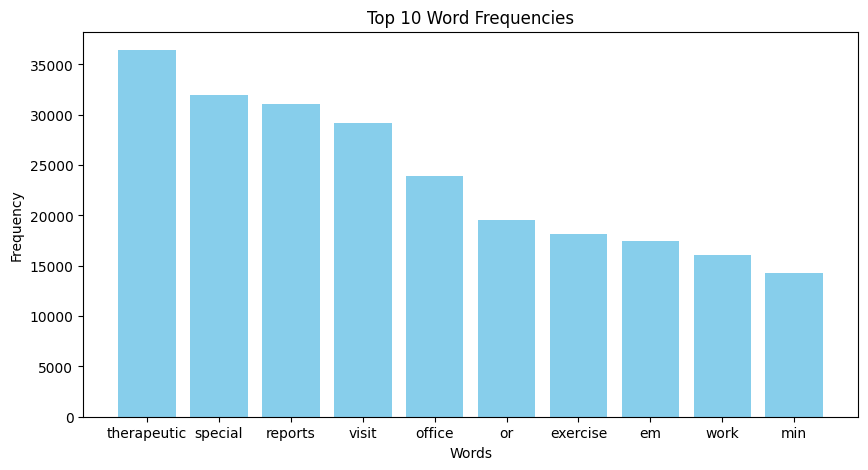


Count Vectorizer Features:
['01' '012200d' '02' ... 'yrs' 'zolpidem' 'zone']

TF-IDF Features:
['01' '012200d' '02' ... 'yrs' 'zolpidem' 'zone']
The dataset has a larger vocabulary. Consider Word2Vec or similar embedding methods.


In [6]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from collections import Counter
import matplotlib.pyplot as plt



# 1. Preprocess Text
def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    return ''.join([char for char in text if char.isalnum() or char.isspace()])

df['cleaned_text'] = df['procedure_description'].apply(preprocess_text)

# 2. Analyze Word Frequencies
all_words = " ".join(df['cleaned_text']).split()
word_counts = Counter(all_words)


# Print Top 10 Words
print("Top 10 Words:")
print(word_counts.most_common(10))

# Plot Word Frequencies
plt.figure(figsize=(10, 5))
most_common = word_counts.most_common(10)
words, counts = zip(*most_common)
plt.bar(words, counts, color='skyblue')
plt.title("Top 10 Word Frequencies")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

# 3. Vectorization Options
# Count Vectorization
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(df['cleaned_text'])
print("\nCount Vectorizer Features:")
print(count_vectorizer.get_feature_names_out())

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])
print("\nTF-IDF Features:")
print(tfidf_vectorizer.get_feature_names_out())

# 4. Pretrained Embeddings (Optional)
# Example Insight: Based on Word Frequency
if len(word_counts) < 50:
    print("The dataset is small with a limited vocabulary. Consider using TF-IDF or pretrained embeddings.")
else:
    print("The dataset has a larger vocabulary. Consider Word2Vec or similar embedding methods.")


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=100)  # Use top 100 words
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text']).toarray()

print("TF-IDF Embeddings Shape:", tfidf_matrix.shape)


TF-IDF Embeddings Shape: (750000, 100)


In [8]:
from gensim.models import Word2Vec

# Tokenize text
df['tokenized_text'] = df['cleaned_text'].apply(lambda x: x.split())

# Train Word2Vec Model
word2vec_model = Word2Vec(sentences=df['tokenized_text'], vector_size=100, window=5, min_count=1, workers=4)

# Function to get sentence embedding (average of word embeddings)
def get_word2vec_embedding(text):
    words = text.split()
    word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(100)  # Handle empty cases

df['word2vec_embedding'] = df['cleaned_text'].apply(get_word2vec_embedding)
word2vec_matrix = np.vstack(df['word2vec_embedding'].values)

print("Word2Vec Embeddings Shape:", word2vec_matrix.shape)


Word2Vec Embeddings Shape: (750000, 100)


In [ ]:
from transformers import BertTokenizer, BertModel
import torch

# Load Pretrained BERT Model
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertModel.from_pretrained("bert-base-uncased")

# Function to get BERT embeddings
def get_bert_embedding(text):
    inputs = bert_tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = bert_model(**inputs)
    return outputs.last_hidden_state[:, 0, :].squeeze().numpy()  # CLS token representation

df['bert_embedding'] = df['cleaned_text'].apply(get_bert_embedding)
bert_matrix = np.vstack(df['bert_embedding'].values)

print("BERT Embeddings Shape:", bert_matrix.shape)


In [ ]:
non_nan_values = df['procedure_description'].dropna().head(3)  # Get the first 3 non-NaN values
print(non_nan_values)